# Title of the project 3: “HR Analytics"

## Tasks to perform: 
Data Cleaning:
Deleting redundant columns.
Renaming the columns.
Dropping duplicates.
Cleaning individual columns.
Remove the NaN values from the dataset
Check for some more Transformations

## Importing Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Loading the Data

In [5]:
filepath=r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\HR-Employee-Attrition.csv'
df=pd.read_csv(filepath)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.shape

(1470, 35)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Cleaning

In [14]:
df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [25]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [26]:

# Drop columns that are not needed
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [27]:
# Convert 'Attrition' column to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [28]:
# Convert 'OverTime' column to binary
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [29]:
# Convert 'Gender' column to binary
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [30]:
# Convert 'MaritalStatus' column to binary
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 0)

# Convert 'BusinessTravel' column to binary
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 1 if x == 'Travel_Frequently' else 0)

# Convert 'Department' column to binary
df['Department'] = df['Department'].apply(lambda x: 1 if x == 'Sales' else 0)

# Convert 'EducationField' column to binary
df['EducationField'] = df['EducationField'].apply(lambda x: 1 if x == 'Life Sciences' else 0)

# Convert 'JobRole' column to binary
df['JobRole'] = df['JobRole'].apply(lambda x: 1 if x == 'Sales Executive' else 0)

# Convert 'Education' column to binary
df['Education'] = df['Education'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'EnvironmentSatisfaction' column to binary
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'JobInvolvement' column to binary
df['JobInvolvement'] = df['JobInvolvement'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'JobSatisfaction' column to binary
df['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'PerformanceRating' column to binary
df['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'RelationshipSatisfaction' column to binary
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)

# Convert 'WorkLifeBalance' column to binary
df['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: 1 if x >= 3 else 0)

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\cleaned_data.csv', index=False)

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,0,1,0,0,...,1,0,0,8,0,0,6,4,0,5
1,49,0,1,279,0,8,0,1,1,1,...,1,1,1,10,3,1,10,7,1,7
2,37,1,0,1373,0,2,0,0,1,1,...,1,0,0,7,3,1,0,0,0,0
3,33,0,1,1392,0,3,1,1,1,0,...,1,1,0,8,3,1,8,7,3,0
4,27,0,0,591,0,2,0,0,0,1,...,1,1,1,6,3,1,2,2,2,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## Renaming Columns

In [33]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop columns that are not needed
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Convert 'Attrition' column to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'OverTime' column to binary
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Rename columns
df.rename(columns={'Age': 'age', 'BusinessTravel': 'business_travel', 'DailyRate': 'daily_rate', 'Department': 'department', 'DistanceFromHome': 'distance_from_home', 'Education': 'education', 'EducationField': 'education_field', 'EnvironmentSatisfaction': 'environment_satisfaction', 'Gender': 'gender', 'HourlyRate': 'hourly_rate', 'JobInvolvement': 'job_involvement', 'JobLevel': 'job_level', 'JobRole': 'job_role', 'JobSatisfaction': 'job_satisfaction', 'MaritalStatus': 'marital_status', 'MonthlyIncome': 'monthly_income', 'MonthlyRate': 'monthly_rate', 'NumCompaniesWorked': 'num_companies_worked', 'OverTime': 'over_time', 'PercentSalaryHike': 'percent_salary_hike', 'PerformanceRating': 'performance_rating', 'RelationshipSatisfaction': 'relationship_satisfaction', 'StockOptionLevel': 'stock_option_level', 'TotalWorkingYears': 'total_working_years', 'TrainingTimesLastYear': 'training_times_last_year', 'WorkLifeBalance': 'work_life_balance', 'YearsAtCompany': 'years_at_company', 'YearsInCurrentRole': 'years_in_current_role', 'YearsSinceLastPromotion': 'years_since_last_promotion', 'YearsWithCurrManager': 'years_with_curr_manager'}, inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\cleaned_data.csv', index=False)

In [34]:
df.head()

,age,Attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Drop Duplicates

In [35]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\cleaned_data.csv', index=False)


In [36]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Clean Individual columns

In [39]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop columns that are not needed
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Clean individual columns
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 0)
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 1 if x == 'Travel_Frequently' else 0)
df['Department'] = df['Department'].apply(lambda x: 1 if x == 'Sales' else 0)
df['EducationField'] = df['EducationField'].apply(lambda x: 1 if x == 'Life Sciences' else 0)
df['JobRole'] = df['JobRole'].apply(lambda x: 1 if x == 'Sales Executive' else 0)
df['Education'] = df['Education'].apply(lambda x: 1 if x >= 3 else 0)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)
df['JobInvolvement'] = df['JobInvolvement'].apply(lambda x: 1 if x >= 3 else 0)
df['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)
df['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: 1 if x >= 3 else 0)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)
df['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: 1 if x >= 3 else 0)

# Rename columns
df.rename(columns={'Age': 'age', 'BusinessTravel': 'business_travel', 'DailyRate': 'daily_rate', 'Department': 'department', 'DistanceFromHome': 'distance_from_home', 'Education': 'education', 'EducationField': 'education_field', 'EnvironmentSatisfaction': 'environment_satisfaction', 'Gender': 'gender', 'HourlyRate': 'hourly_rate', 'JobInvolvement': 'job_involvement', 'JobLevel': 'job_level', 'JobRole': 'job_role', 'JobSatisfaction': 'job_satisfaction', 'MaritalStatus': 'marital_status', 'MonthlyIncome': 'monthly_income', 'MonthlyRate': 'monthly_rate', 'NumCompaniesWorked': 'num_companies_worked', 'OverTime': 'over_time', 'PercentSalaryHike': 'percent_salary_hike', 'PerformanceRating': 'performance_rating', 'RelationshipSatisfaction': 'relationship_satisfaction', 'StockOptionLevel': 'stock_option_level', 'TotalWorkingYears': 'total_working_years', 'TrainingTimesLastYear': 'training_times_last_year', 'WorkLifeBalance': 'work_life_balance', 'YearsAtCompany': 'years_at_company', 'YearsInCurrentRole': 'years_in_current_role', 'YearsSinceLastPromotion': 'years_since_last_promotion', 'YearsWithCurrManager': 'years_with_curr_manager'}, inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\cleaned_data.csv', index=False)

In [40]:
df.head()

,age,Attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,0,1102,1,1,0,1,0,0,...,1,0,0,8,0,0,6,4,0,5
1,49,0,1,279,0,8,0,1,1,1,...,1,1,1,10,3,1,10,7,1,7
2,37,1,0,1373,0,2,0,0,1,1,...,1,0,0,7,3,1,0,0,0,0
3,33,0,1,1392,0,3,1,1,1,0,...,1,1,0,8,3,1,8,7,3,0
4,27,0,0,591,0,2,0,0,0,1,...,1,1,1,6,3,1,2,2,2,2


In [41]:
df.describe()

,age,Attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.188435,802.485714,0.303401,9.192517,0.692517,0.412245,0.611565,0.600000,...,1.0,0.606122,0.793878,11.279592,2.799320,0.711565,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.391193,403.509100,0.459884,8.106864,0.461608,0.492406,0.487560,0.490065,...,0.0,0.488775,0.852077,7.780782,1.289271,0.453189,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,6.000000,2.000000,0.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,802.000000,0.000000,7.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,10.000000,3.000000,1.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,0.000000,1157.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,15.000000,3.000000,1.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1.000000,1499.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,3.000000,40.000000,6.000000,1.000000,40.000000,18.000000,15.000000,17.000000


In [42]:
df.shape

(1470, 31)

In [43]:
df.columns

Index(['age', 'Attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [46]:
# Drop redundant columns
df = df.loc[:, ~df.columns.duplicated()]

# Rename columns
df.rename(columns={'Age': 'age', 'BusinessTravel': 'business_travel', 'DailyRate': 'daily_rate', 'Department': 'department', 'DistanceFromHome': 'distance_from_home', 'Education': 'education', 'EducationField': 'education_field', 'EnvironmentSatisfaction': 'environment_satisfaction', 'Gender': 'gender', 'HourlyRate': 'hourly_rate', 'JobInvolvement': 'job_involvement', 'JobLevel': 'job_level', 'JobRole': 'job_role', 'JobSatisfaction': 'job_satisfaction', 'MaritalStatus': 'marital_status', 'MonthlyIncome': 'monthly_income', 'MonthlyRate': 'monthly_rate', 'NumCompaniesWorked': 'num_companies_worked', 'OverTime': 'over_time', 'PercentSalaryHike': 'percent_salary_hike', 'PerformanceRating': 'performance_rating', 'RelationshipSatisfaction': 'relationship_satisfaction', 'StockOptionLevel': 'stock_option_level', 'TotalWorkingYears': 'total_working_years', 'TrainingTimesLastYear': 'training_times_last_year', 'WorkLifeBalance': 'work_life_balance', 'YearsAtCompany': 'years_at_company', 'YearsInCurrentRole': 'years_in_current_role', 'YearsSinceLastPromotion': 'years_since_last_promotion', 'YearsWithCurrManager': 'years_with_curr_manager'}, inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\HP\Downloads\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\cleaned_data.csv', index=False)


In [47]:
df.head()

,age,Attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,0,1102,1,1,0,1,0,0,...,1,0,0,8,0,0,6,4,0,5
1,49,0,1,279,0,8,0,1,1,1,...,1,1,1,10,3,1,10,7,1,7
2,37,1,0,1373,0,2,0,0,1,1,...,1,0,0,7,3,1,0,0,0,0
3,33,0,1,1392,0,3,1,1,1,0,...,1,1,0,8,3,1,8,7,3,0
4,27,0,0,591,0,2,0,0,0,1,...,1,1,1,6,3,1,2,2,2,2


In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df[['age', 'daily_rate']]
y=df['total_working_years']
lr.fit(x,y)

LinearRegression()

In [51]:
y_hat=lr.predict(x)
y_hat[0:5]

array([13.68339206, 18.20356795, 11.4036295 ,  9.08857864,  5.49984505])

In [60]:
coefficient = lr.coef_
intercept = lr.intercept_
print('Coefficient:', coefficient)
print('Intercept:', intercept)

Coefficient: [5.79427871e-01 1.40032906e-04]
Intercept: -10.227466918731706


<Axes: xlabel='age', ylabel='daily_rate'>

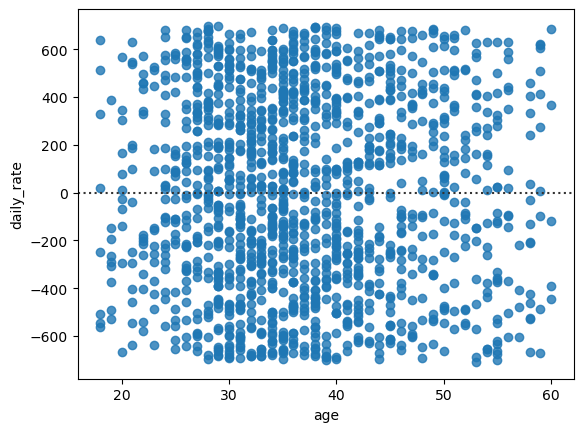

In [61]:
import seaborn as sns
sns.residplot(x=df['age'],
             y=df['daily_rate']
             )


<Axes: xlabel='age', ylabel='Density'>

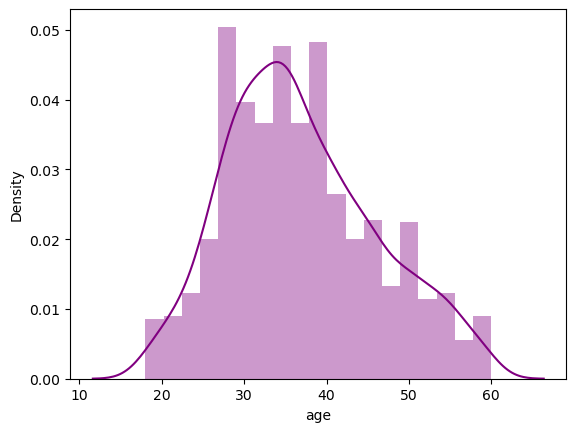

In [72]:
sns.distplot(df['age'], hist=True, color='purple')

In [82]:
from sklearn.metrics import r2_score

r2_score=lr.score(x,y)
print("r2_score:", r2_score)

r2_score: 0.46297040509526066


In [87]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_hat)
print("Mean Square Error:", mse)

Mean Square Error: 32.48995722472448
